<a href="https://colab.research.google.com/github/Novaz-Edd/Machine-Learning-Models/blob/main/Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Random Forest Regressor**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import io

# 1.Load Data
df = pd.read_csv('insurance.csv')

# 2. Preprocessing
# Convert text columns (sex, smoker, region) to numbers
df = pd.get_dummies(df, drop_first=True)

# 3. Separate Input (X) and Target (y)
X = df.drop('charges', axis=1)
y = df['charges']

# 4. Split into Train (80%) and Test (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"✅ Data Loaded! Training with {X_train.shape[0]} samples.")
print(f"✅ Testing with {X_test.shape[0]} samples.")

✅ Data Loaded! Training with 1070 samples.
✅ Testing with 268 samples.


# **Random Forest Regressor Using Library**

🌳 Random Forest Score: 0.87 (Closer to 1.0 is better)



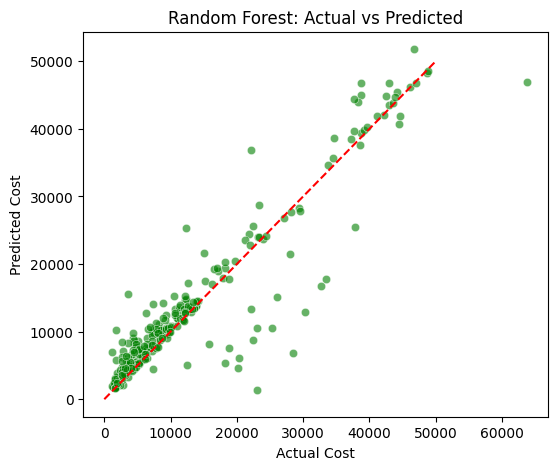

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Train the Model
# n_estimators=100 means we use 100 different trees
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# 2. Predict on new data
y_pred = rf_model.predict(X_test)

# 3. See how well it did
score = r2_score(y_test, y_pred)
print(f"🌳 Random Forest Score: {score:.2f} (Closer to 1.0 is better)\n")

# 4. Visualize the Result
plt.figure(figsize=(6,5))
sns.scatterplot(x=y_test, y=y_pred, color='green', alpha=0.6)
plt.plot([0, 50000], [0, 50000], 'r--')
plt.xlabel('Actual Cost')
plt.ylabel('Predicted Cost')
plt.title('Random Forest: Actual vs Predicted')
plt.show()

# **Algorithm Under the Hood**

🌳 Random Forest Score: 0.87


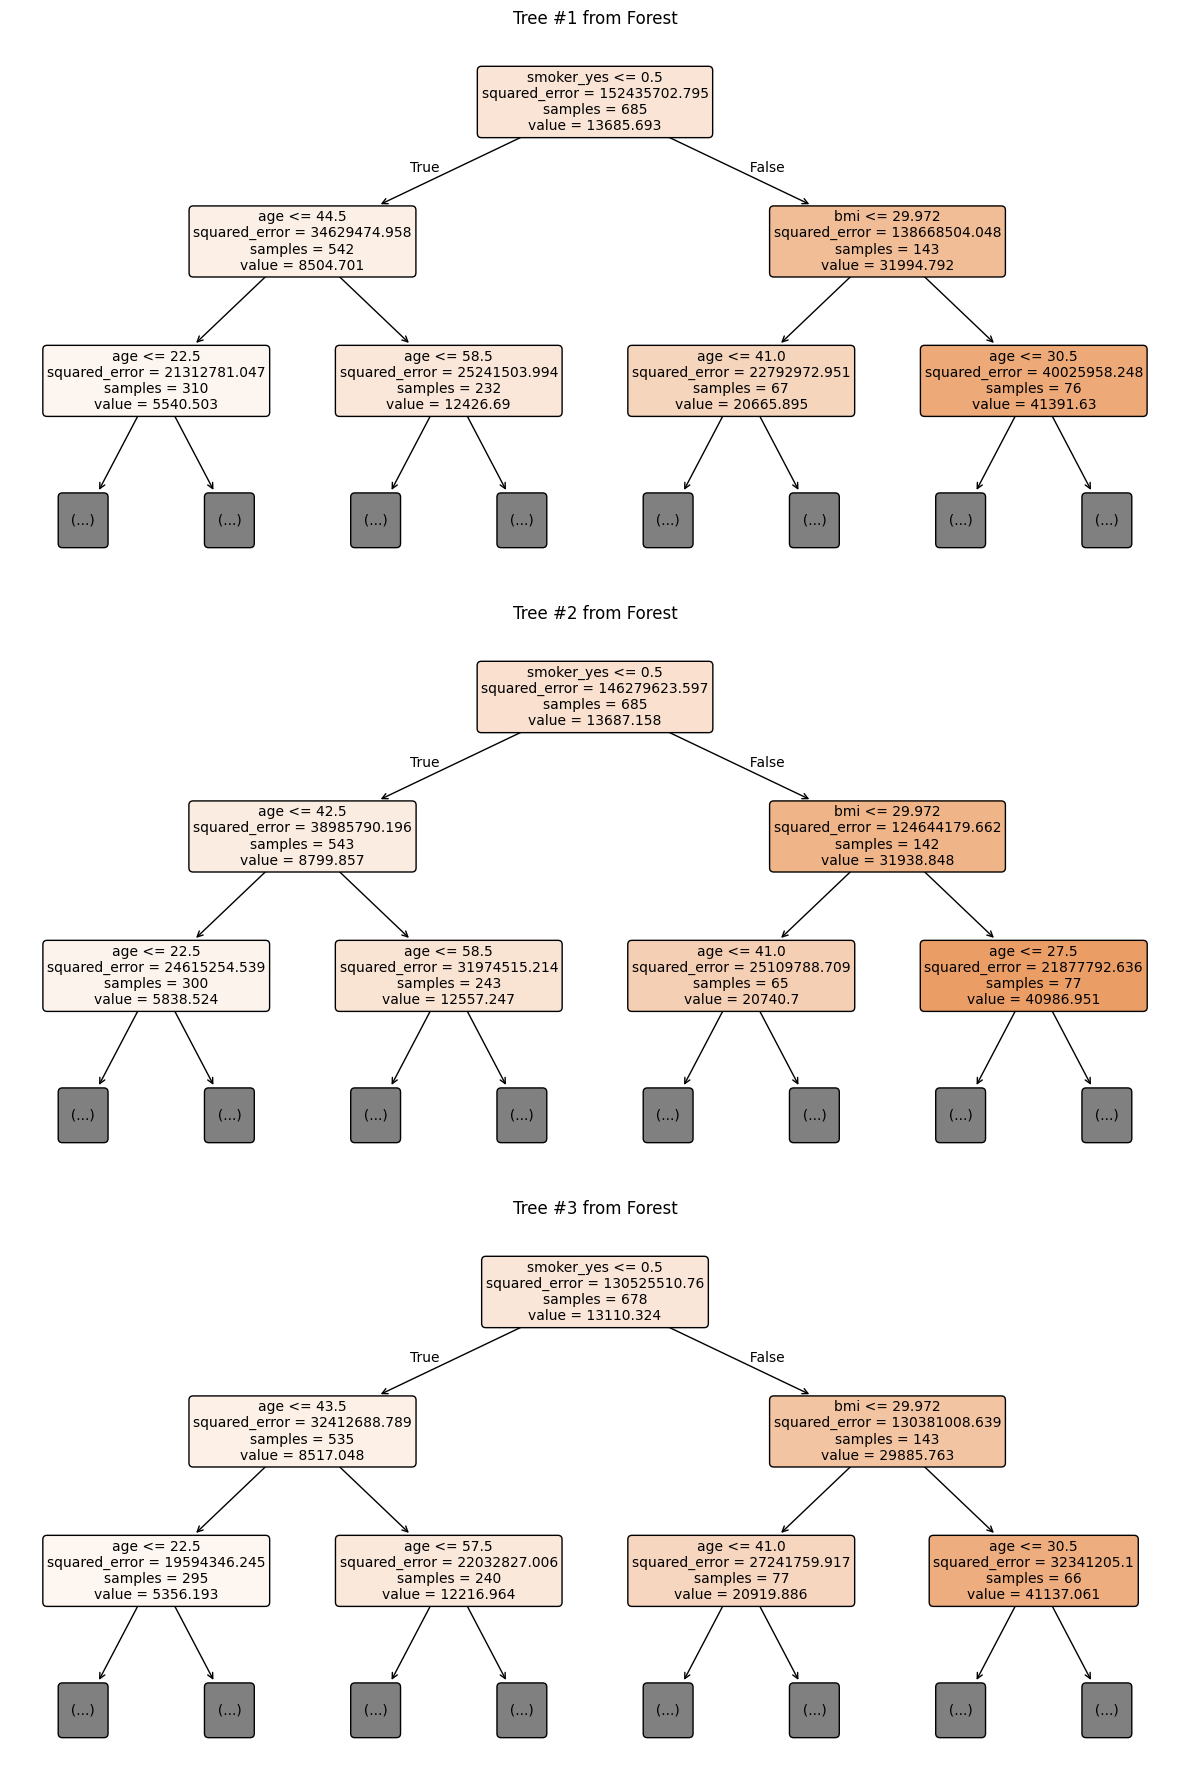

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import plot_tree
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load and Prep Data
df = pd.read_csv('insurance.csv')
df_encoded = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], drop_first=True)
X = df_encoded.drop('charges', axis=1)
y = df_encoded['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 1. Train
# n_estimators=100 means we create 100 trees
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# 2. Predict
y_pred = rf_model.predict(X_test)

# 3. Score
score = r2_score(y_test, y_pred)
print(f"🌳 Random Forest Score: {score:.2f}")

# 4. Diagram: 3 Example Trees (Stacked Vertically)
# figsize=(width, height) -> We make height larger (18) to fit 3 trees
plt.figure(figsize=(12, 18))

for i in range(3):
    plt.subplot(3, 1, i+1) # 3 Rows, 1 Column, Position i+1
    plot_tree(rf_model.estimators_[i],
              feature_names=X.columns,
              filled=True,
              rounded=True,
              fontsize=10,
              max_depth=2)
    plt.title(f"Tree #{i+1} from Forest")

plt.tight_layout()
plt.show()